# Search, Matching and Unemployment

by [MachinaFantasma](https://phantomachine.github.io/) | [Twitter](https://twitter.com/MachinaFantasma)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Search,-Matching-and-Unemployment" data-toc-modified-id="Search,-Matching-and-Unemployment-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Search, Matching and Unemployment</a></span></li><li><span><a href="#Key-learning-points" data-toc-modified-id="Key-learning-points-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Key learning points</a></span></li><li><span><a href="#Key-labor-market-variables" data-toc-modified-id="Key-labor-market-variables-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Key labor market variables</a></span></li><li><span><a href="#Some-custom-methods" data-toc-modified-id="Some-custom-methods-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Some custom methods</a></span></li><li><span><a href="#Data:-US-case-study" data-toc-modified-id="Data:-US-case-study-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data: US case study</a></span><ul class="toc-item"><li><span><a href="#Unemployment-rate(s)" data-toc-modified-id="Unemployment-rate(s)-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Unemployment rate(s)</a></span></li><li><span><a href="#Vacancies" data-toc-modified-id="Vacancies-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Vacancies</a></span></li><li><span><a href="#Labor-force-participation" data-toc-modified-id="Labor-force-participation-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Labor force participation</a></span></li><li><span><a href="#Beveridge-curve" data-toc-modified-id="Beveridge-curve-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Beveridge curve</a></span></li><li><span><a href="#Business-cycle-frequencies" data-toc-modified-id="Business-cycle-frequencies-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Business cycle frequencies</a></span><ul class="toc-item"><li><span><a href="#Missing-data-and-quarterly-resampling" data-toc-modified-id="Missing-data-and-quarterly-resampling-5.5.1"><span class="toc-item-num">5.5.1&nbsp;&nbsp;</span>Missing data and quarterly resampling</a></span></li><li><span><a href="#Add-(quarterly)-data-on-GDP-and-Labor-Productivity" data-toc-modified-id="Add-(quarterly)-data-on-GDP-and-Labor-Productivity-5.5.2"><span class="toc-item-num">5.5.2&nbsp;&nbsp;</span>Add (quarterly) data on GDP and Labor Productivity</a></span></li></ul></li></ul></li><li><span><a href="#Shimer-data-set" data-toc-modified-id="Shimer-data-set-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Shimer data set</a></span><ul class="toc-item"><li><span><a href="#De-meaning-data" data-toc-modified-id="De-meaning-data-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>De-meaning data</a></span></li><li><span><a href="#HP-filtering" data-toc-modified-id="HP-filtering-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>HP-filtering</a></span></li><li><span><a href="#Replicating-Shimer's-correlation-table-with-our-data" data-toc-modified-id="Replicating-Shimer's-correlation-table-with-our-data-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Replicating Shimer's correlation table with our data</a></span></li><li><span><a href="#Replicating-Shimer's-correlation-table-with-Shimer's-data" data-toc-modified-id="Replicating-Shimer's-correlation-table-with-Shimer's-data-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Replicating Shimer's correlation table with Shimer's data</a></span></li><li><span><a href="#Revisit-by-Hagedorn-and-Manovskii" data-toc-modified-id="Revisit-by-Hagedorn-and-Manovskii-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Revisit by Hagedorn and Manovskii</a></span></li></ul></li><li><span><a href="#Key-Labor-Market-Observations" data-toc-modified-id="Key-Labor-Market-Observations-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Key Labor Market Observations</a></span><ul class="toc-item"><li><span><a href="#Fact-1" data-toc-modified-id="Fact-1-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Fact 1</a></span></li><li><span><a href="#Fact-2" data-toc-modified-id="Fact-2-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Fact 2</a></span></li></ul></li><li><span><a href="#Accounting-for-business-cycle-statistics" data-toc-modified-id="Accounting-for-business-cycle-statistics-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Accounting for business-cycle statistics</a></span></li><li><span><a href="#Readings" data-toc-modified-id="Readings-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Readings</a></span></li></ul></div>

In [1]:
import numpy as np
import dbnomics as db
from dbnomics import fetch_series, fetch_series_by_api_link
import pandas as pd
import pandas_datareader as pdr
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import seaborn as sns

In [2]:
%matplotlib inline

# Key learning points

1. List the key labor market facts concerning the unemployment rate, the participation rate, and the employment/population ratio. 

2. Describe the Beveridge curve, and explain its importance. 

3. In the one-sided search model, explain how the reservation wage is determined.

4. Show how the one-sided search model determines the unemployment rate. 

5. Use the one-sided search model to determine the effects of changes to wage and unemployment.

6. Construct an equilibrium in the two-sided search model.

7. Use the two-sided search model to explain how shocks to the labor market change labor force participation, unemployment, vacancies, aggregate output, and labor market tightness.

8. Replicate US business cycle statistics on labor market using a well-known dynamic and stochastic version of the two-sided search model.

# Key labor market variables

|    Mnemonic     | Description                  |
|:----------------|:-----------------------------|
|    $N$          | Working age population       |
|    $Q$          | Labor force                  |
|    $U$          | Unemployed                   |
|    $U/Q$        | Unemployoment rate           |
|    $Q/N$        | Participation rate           |
|    $(Q-U)/N$    | Employment/Population ratio  |

In [3]:
def hpfilter2df(df, λ=1600):
    # Start off with empty DICT
    Y_cycle = {}
    Y_trend = {}
    # HP smoothing parameter (Shimer, AER2005)
    λ = 1600
    # Loop over series in dfQ, apply filter to series named "key", store in DICTs
    for key, series in df.iteritems():
        Y_cycle[key], Y_trend[key] = sm.tsa.filters.hpfilter(series, λ)
    # Convert DICTs to Pandas dataframes
    Y_cycle = pd.DataFrame.from_dict(Y_cycle)
    Y_trend = pd.DataFrame.from_dict(Y_trend)
    return Y_cycle, Y_trend

# Some custom methods

In [4]:
def seaborn_jointplot(x_key, y_key, df, xlabel=None, ylabel=None):
    """Custom wrapper to do seaborn jointplots"""
    g = (sns.jointplot(x_key, y_key, 
                      data=df, 
                      kind="reg",
                      color ="blue",
                      marker="+",
                      joint_kws = {'scatter_kws':dict(alpha=0.2)}
                  )
    ).plot_joint(sns.kdeplot, zorder=0, n_levels=6)
    if xlabel != None:
        g.ax_joint.set_xlabel(xlabel)
    if ylabel != None:
        g.ax_joint.set_ylabel(ylabel)

In [5]:
def timeseries_df2acf1(df):
    """Take a Pandas dataframe df. Calculate first order autocorrelations."""
    # Loop to calculate first-order autocorrelation of each series
    autocorr1 = {}
    for key, series in df.iteritems():
        autocorr1[key] = series.autocorr(lag=1)
    acf_1 = pd.DataFrame.from_dict(autocorr1, orient='index', columns=["ACF(1)"])
    return acf_1

In [6]:
def correlation_map(df, figsize=(7,6), fontsize=0.8, colormap='coolwarm'):
    """Generate SEABORN heatmap for Pearson correlation table,
    given Pandas dataframe df."""
    # Get the lower triangle and diagonal of table
    matrix = np.tril(df.corr(), k=-1)
    # Mask/hide upper triangular duplicate
    plt.figure(figsize=figsize)
    sns.set(font_scale =fontsize)
    sns.heatmap(df.corr(), annot=True, cmap=colormap, mask=matrix)
    plt.show(block=False)

# Data: US case study

Let's set our start and end dates for the time series sample.

We'll look at the US case for our study here.

The data can be found from the [FRED database](https://fred.stlouisfed.org/) hosted by the St. Louis Fed.

In [7]:
# Most current (year, month) available
current_year = 2020
current_month = 8

# year, month, day 
start = dt.datetime(1950, 12, 1)
end = dt.datetime(current_year, current_month, 1)

I've chosen to use the ``pandas-datareader`` [library](https://pandas-datareader.readthedocs.io/en/latest/) for doing my data importing work into ``Pandas`` dataframe.

Here's [an easy tutorial](https://medium.com/swlh/pandas-datareader-federal-reserve-economic-data-fred-a360c5795013) for using ``pandas-datareader`` with the Federal Reserve Economic Data(base) or [FRED](https://fred.stlouisfed.org/).

In [8]:
# Get the data - need to dig around on FRED: https://fred.stlouisfed.org/
list_of_series = ['UNRATE', 'LNS14000006', 'JTSJOR', 
                  'CIVPART', 'LNS11300002', 'LNS11300001',
                  'EMRATIO', 'PAYEMS',
                 ]
df = pdr.DataReader(list_of_series, 'fred', start, end)

In [9]:
# Update column titles with more readable names
newnames = ["Unemployment Rate", 
            "Unemployment Rate (Black)", 
            "Vacancy Rate", 
            "Participation Rate",
            "Participation Rate (Female)",
            "Participation Rate (Male)",
            "Employment-Population Ratio",
            "Employment",
           ]
df.columns = newnames

In [10]:
# Look at first thre rows of the dataframe
df.head(3)

,Unemployment Rate,Unemployment Rate (Black),Vacancy Rate,Participation Rate,Participation Rate (Female),Participation Rate (Male),Employment-Population Ratio,Employment
DATE,,,,,,,,
1950-12-01,4.3,NaN,NaN,59.2,34.0,86.3,56.7,46861
1951-01-01,3.7,NaN,NaN,59.1,34.3,86.0,56.9,47288
1951-02-01,3.4,NaN,NaN,59.1,34.2,86.3,57.0,47577


It's always a good habit to visualize the data you'll work with. 

We'll preview the raw, monthly-frequency time series.

## Unemployment rate(s)

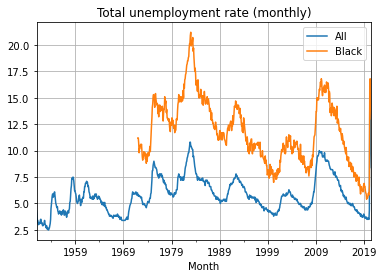

In [11]:
ax = df.plot(  y=['Unemployment Rate', 'Unemployment Rate (Black)'],
               grid=True,
               xlabel="Month",
               title="Total unemployment rate (monthly)"
            )
ax.legend(['All', 'Black'])
plt.show(block=False)

The series ``LNS14000006`` refers to the unemployment rate among those classified as "Black or African American".

It appears uniformly higher than the overall unemployment rate in the economy.

## Vacancies

Vacancies data were not available until the 2000s in the US:

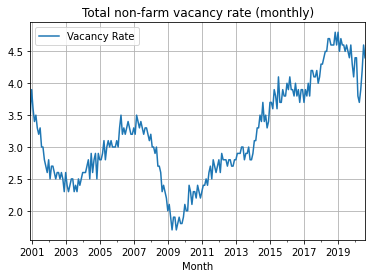

In [12]:
ax = df.dropna(subset=['Vacancy Rate']).plot(   
           y=['Vacancy Rate'],
           grid=True,
           xlabel="Month",
           title="Total non-farm vacancy rate (monthly)"
          )
plt.show(block=False)

## Labor force participation

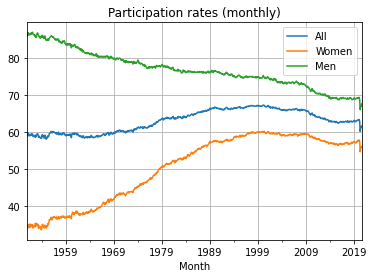

In [13]:
ylist = ['Participation Rate', 
         'Participation Rate (Female)', 
         'Participation Rate (Male)']
ax = df.plot(  y=ylist,
               grid=True,
               xlabel="Month",
               title="Participation rates (monthly)"
          )
ax.legend(["All", "Women", "Men"])
plt.show(block=False)

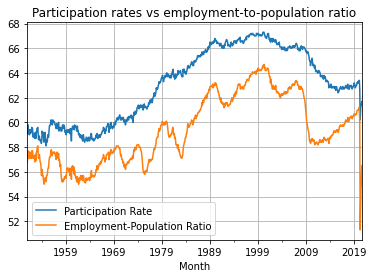

In [14]:
ax = df.plot(  y=['Participation Rate', 'Employment-Population Ratio'],
               grid=True,
               xlabel="Month",
               title="Participation rates vs employment-to-population ratio"
          )
plt.show(block=False)

## Beveridge curve

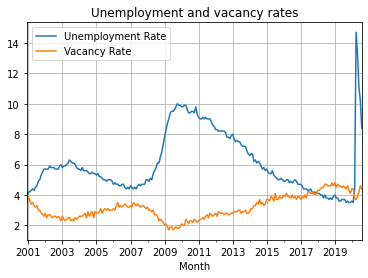

In [15]:
ax = df.dropna(subset=['Vacancy Rate']).plot(   y=['Unemployment Rate', 'Vacancy Rate'],
           grid=True,
           xlabel="Month",
           title="Unemployment and vacancy rates"
          )
plt.show(block=False)

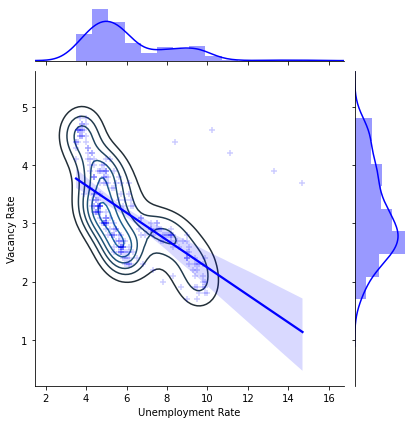

In [16]:
seaborn_jointplot("Unemployment Rate", "Vacancy Rate", df)

There appears to be a negative statistical association between unemployment rate and vacancies.

## Business cycle frequencies

We previously plotted raw monthly time series.

However, some other data series like aggregate output (say, GDP) or productivity are usually only available as quarterly time series.

In this part, we consider resampling our monthly data into quarterly measures.

Economists working with business cycles often pre-treat the data to remove any slow-moving (trend) variations in the data.

We will also consider how to do this de-trending, using a filter model called the Hodrick-Prescott (HP) filter.



### Missing data and quarterly resampling

We'll drop the periods that have missing data using the ``dropna()`` attribute.

Our source data is monthly. Let's do a quarterly averaging across monthly observations. This is done using the ``resample()`` attribute and taking the ``mean()``
of samplings of three-monthly observations.

In [17]:
dfQ = df.resample('Q', convention='start').mean()

We'll also leave out the last three quarters with anomalies beginning in 2020 (due to COVID-19).

In [18]:
# smaller than the end date
end_date = '2020-03-31'
mask = (dfQ.index < end_date) 
mask
dq = dfQ[mask]

In [19]:
# Truncated dfQ (cut out COVID-19 quarters)
dfQ = dfQ[mask]

### Add (quarterly) data on GDP and Labor Productivity

In [20]:
tmin = dfQ.index.min()
tmin

Timestamp('1950-12-31 00:00:00', freq='Q-DEC')

In [21]:
tmax = dfQ.index.max()
tmax

Timestamp('2019-12-31 00:00:00', freq='Q-DEC')

In [22]:
dfY = pdr.DataReader(['GDPC1', 'PRS85006163', 'PRS85006013', 'OUTNFB'], 'fred', tmin, tmax)
dfY

,GDPC1,PRS85006163,PRS85006013,OUTNFB
DATE,,,,
1951-01-01,2415.660,31.582,41.853,13.218
1951-04-01,2457.517,31.475,42.202,13.283
1951-07-01,2508.166,32.004,42.017,13.447
1951-10-01,2513.690,32.075,42.070,13.494
1952-01-01,2540.550,32.387,42.144,13.649
...,...,...,...,...
2018-10-01,18813.923,105.967,112.573,119.291
2019-01-01,18950.347,106.818,112.730,120.415
2019-04-01,19020.599,107.045,112.831,120.780


In [23]:
# Drop first row of dfQ (we inspected to ensure that was not in dfY)
dfQ_drop = dfQ.iloc[1:]
# Make dfY timestamp the same as dfQ_drop
dfQY = dfY.reindex_like(dfQ_drop)
# Replace entries of dfQ_drop into empty dfQY
dfQY[:] = dfQ_drop[:]
# Insert new column series GDP
dfQY["GDP"] = dfY["GDPC1"].array
# Insert output per person (nonfarm business) series
dfQY["Output per person (Nonfarm Business)"] = dfY['PRS85006163'].array
# Insert output (nonfarm business) series
dfQY["Output (Nonfarm Business)"] = dfY['OUTNFB'].array
# Insert employment (nonfarm business) series
dfQY["Employment (Nonfarm Business)"] = dfY['PRS85006013'].array
# Create Shimer's productivity series
dfQY["Productivity"] = dfQY["Output (Nonfarm Business)"]/dfQY["Employment (Nonfarm Business)"]

In [24]:
dfQY.head(2)

,Unemployment Rate,Unemployment Rate (Black),Vacancy Rate,Participation Rate,Participation Rate (Female),Participation Rate (Male),Employment-Population Ratio,Employment,GDP,Output per person (Nonfarm Business),Output (Nonfarm Business),Employment (Nonfarm Business),Productivity
DATE,,,,,,,,,,,,,
1951-03-31,3.5,NaN,NaN,59.333333,34.500000,86.400000,57.200000,47579.333333,2415.660,31.582,13.218,41.853,0.315820
1951-06-30,3.1,NaN,NaN,59.166667,34.433333,86.433333,57.333333,47959.000000,2457.517,31.475,13.283,42.202,0.314748


In [25]:
# Drop NaN (vacancies not available in JOLTS until Dec 2000)
dfD = dfQY.dropna()
dfD.head()

,Unemployment Rate,Unemployment Rate (Black),Vacancy Rate,Participation Rate,Participation Rate (Female),Participation Rate (Male),Employment-Population Ratio,Employment,GDP,Output per person (Nonfarm Business),Output (Nonfarm Business),Employment (Nonfarm Business),Productivity
DATE,,,,,,,,,,,,,
2000-12-31,3.900000,7.333333,3.500000,66.900000,59.833333,74.600000,64.300000,132538.666667,13260.506,78.904,80.514,102.040,0.789044
2001-03-31,4.233333,8.066667,3.633333,67.166667,60.100000,74.833333,64.333333,132744.666667,13222.690,78.207,80.123,102.450,0.782069
2001-06-30,4.400000,8.066667,3.333333,66.766667,59.733333,74.433333,63.833333,132390.666667,13299.984,79.293,80.697,101.771,0.792927
2001-09-30,4.833333,8.666667,3.100000,66.700000,59.600000,74.333333,63.466667,131992.000000,13244.784,79.351,80.149,101.005,0.793515
2001-12-31,5.500000,9.800000,2.700000,66.700000,59.733333,74.333333,63.033333,131192.666667,13280.859,80.178,80.234,100.070,0.801779


# Shimer data set

For comparison, we also look at a well-known but older data set by Robert Shimer, [downloadable from the AER site](https://www.aeaweb.org/articles?id=10.1257/0002828053828572).

Below, I assume you've already downloaded the source data.

In [26]:
df_shimer = pd.read_excel('116040-V1/data.xls', sheet_name="Monthly Data")
df_shimer = df_shimer[5:]
df_shimer.head()

,Title:,Unemployment Rate,Unemployment Level,Job Openings,Help Wanted Advertising,Unemployment < 5 weeks,Adjusted to Unemployed < 5 Weeks,Job Finding Rate,Civilian Employment: Sixteen Years & Over,Separation Rate
5,1951-01-01 00:00:00,3.7,2305,NaN,40,1115,1115,0.561822,59636,0.0258141
6,1951-02-01 00:00:00,3.4,2117,NaN,41,1107,1107,0.570146,59661,0.0284855
7,1951-03-01 00:00:00,3.4,2125,NaN,43,1215,1215,0.642824,60401,0.0283014
8,1951-04-01 00:00:00,3.1,1919,NaN,42,1160,1160,0.619072,59889,0.027206
9,1951-05-01 00:00:00,3,1856,NaN,43,1125,1125,0.53125,60188,0.0254522


The vacancy data from JOLTS only began in December 2000.

Shimer wanted a longer data series that goes back to 1951. Hence he used the now-discontinued Conference Board data on "Help Wanted Advertising" index (in newspapers). He showed that this series tracks the JOLTS vacancy data quite well.

In [27]:
cherrypick = ["Unemployment Level", "Help Wanted Advertising", "Job Finding Rate"]
dfs = df_shimer[cherrypick]

We make date-stamp index in this new dataframe ``dfs`` consistent with that of the previous monthly-series dataframe ``df``:

In [28]:
dfs = dfs.set_index(df.index[0:len(dfs)])

It turns out that the imported Shimer data was stored as ``object`` datatypes. 

In [29]:
dfs.dtypes

Unemployment Level         object
Help Wanted Advertising    object
Job Finding Rate           object
dtype: object

We need to make this usable as ``float`` datatypes:

In [30]:
dfs = dfs.astype("float")

Now we convert these monthly series into quarterly averages:

In [31]:
dfsQ = dfs.resample('Q').mean()
dfsQ

,Unemployment Level,Help Wanted Advertising,Job Finding Rate
DATE,,,
1950-12-31,2305.000000,40.000000,0.561822
1951-03-31,2053.666667,42.000000,0.610681
1951-06-30,1933.666667,42.000000,0.587562
1951-09-30,2064.666667,41.666667,0.575571
1951-12-31,2036.666667,42.666667,0.588945
...,...,...,...
2002-12-31,8563.666667,40.000000,0.360970
2003-03-31,8633.000000,39.000000,0.352148
2003-06-30,9083.333333,37.333333,0.340466


Shimer also includes a different labor productivity series from the BLS.

Let's import from Shimer's Excel data file.

In [32]:
df_shimer_qtr = pd.read_excel('116040-V1/data.xls', sheet_name="Quarterly Data")
df_shimer_qtr.head(10)

,Title:,PRODUCTIVITY
0,Source:,http://www.bls.gov/lpc/home.htm
1,Seasonal Adjustment:,Seasonally Adjusted
2,Units:,"Index, 1992=100"
3,Downloaded:,2004-12-04 00:00:00
4,NaN,NaN
5,NaN,PROD
6,1951Qtr1,48.7
7,1951Qtr2,48.5
8,1951Qtr3,49.4
9,1951Qtr4,49.4


In [33]:
# Clean up a bit (drop junk in first 6 rows and obs since 2004Q1)
df_shimer_q = df_shimer_qtr[6:218]
df_shimer_q

,Title:,PRODUCTIVITY
6,1951Qtr1,48.7
7,1951Qtr2,48.5
8,1951Qtr3,49.4
9,1951Qtr4,49.4
10,1952Qtr1,49.8
...,...,...
213,2002Qtr4,122.7
214,2003Qtr1,123.6
215,2003Qtr2,125.3
216,2003Qtr3,128


Shimer's productivity series only begins a quarter later in 1951.

So I'll trick it to say ``NaN`` for the last quarter of 1950 to make the series' length match up with that of our dataframe ``dfsQ`` above:

In [34]:
qproductivity_shimer = df_shimer_q["PRODUCTIVITY"].array.astype("float")
qproductivity_shimer = np.insert(qproductivity_shimer, 0, np.nan, axis=0)

Then we'll plug this into ``dfsQ``:

In [35]:
dfsQ[r"$p$ (Shimer)"] = qproductivity_shimer
dfsQ.head()

,Unemployment Level,Help Wanted Advertising,Job Finding Rate,$p$ (Shimer)
DATE,,,,
1950-12-31,2305.000000,40.000000,0.561822,NaN
1951-03-31,2053.666667,42.000000,0.610681,48.7
1951-06-30,1933.666667,42.000000,0.587562,48.5
1951-09-30,2064.666667,41.666667,0.575571,49.4
1951-12-31,2036.666667,42.666667,0.588945,49.4


Then we'll drop the row containing ``NaN`` (1950-12-31 quarter) from ``dfsQ``:

In [36]:
dfsQ = dfsQ.dropna()

We'll combine this Shimer dataset with a subset of our previous quarterly-averaged dataframe ``dfQY``.

We then store this as a new dataframe ``S``:

In [37]:
# Copy previous dataframe dfQY, of same starting date, but longer
# so we truncate dfQY up to the shorter end-date of Shimer's dfsQ
S = (dfQY.copy()).head(len(dfsQ))
# S

In [38]:
# Insert Shimer's series into S
S[r"$u$"] = dfsQ["Unemployment Level"].array
S[r"$v$"] = dfsQ["Help Wanted Advertising"].array

# Add θ=v/u tightness series
S[r"$\theta$"] = S[r"$v$"].divide(S[r"$u$"])

# Insert Shimer's series into S
S[r"$f$"] = dfsQ["Job Finding Rate"].array
S[r"$p$"] = dfsQ[r"$p$ (Shimer)"].array

# Copy FRED's version of p
S[r"$p_{FRED}$"] = S["Output per person (Nonfarm Business)"].array

In [39]:
S

,Unemployment Rate,Unemployment Rate (Black),Vacancy Rate,Participation Rate,Participation Rate (Female),Participation Rate (Male),Employment-Population Ratio,Employment,GDP,Output per person (Nonfarm Business),Output (Nonfarm Business),Employment (Nonfarm Business),Productivity,$u$,$v$,$\theta$,$f$,$p$,$p_{FRED}$
DATE,,,,,,,,,,,,,,,,,,,
1951-03-31,3.500000,NaN,NaN,59.333333,34.500000,86.400000,57.200000,47579.333333,2415.660,31.582,13.218,41.853,0.315820,2053.666667,42.000000,0.020451,0.610681,48.7,31.582
1951-06-30,3.100000,NaN,NaN,59.166667,34.433333,86.433333,57.333333,47959.000000,2457.517,31.475,13.283,42.202,0.314748,1933.666667,42.000000,0.021720,0.587562,48.5,31.475
1951-09-30,3.166667,NaN,NaN,59.233333,34.766667,86.400000,57.366667,48009.000000,2508.166,32.004,13.447,42.017,0.320037,2064.666667,41.666667,0.020181,0.575571,49.4,32.004
1951-12-31,3.366667,NaN,NaN,59.400000,34.866667,86.700000,57.366667,48155.666667,2513.690,32.075,13.494,42.070,0.320751,2036.666667,42.666667,0.020949,0.588945,49.4,32.075
1952-03-31,3.066667,NaN,NaN,59.300000,34.666667,86.766667,57.500000,48440.666667,2540.550,32.387,13.649,42.144,0.323866,1860.333333,42.666667,0.022935,0.637255,49.8,32.387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002-12-31,5.866667,10.600000,2.466667,66.433333,59.533333,73.766667,62.533333,130571.666667,13559.032,82.780,81.974,99.026,0.827803,8563.666667,40.000000,0.004671,0.360970,122.7,82.780
2003-03-31,5.866667,10.500000,2.433333,66.366667,59.666667,73.500000,62.466667,130418.666667,13634.253,83.280,82.396,98.939,0.832796,8633.000000,39.000000,0.004518,0.352148,123.6,83.280
2003-06-30,6.133333,11.100000,2.466667,66.433333,59.766667,73.600000,62.333333,130189.000000,13751.543,84.345,83.224,98.671,0.843449,9083.333333,37.333333,0.004110,0.340466,125.3,84.345


There appears to be a difference in level (but similar volatility) between Shimer's nonfarm business sector labor productivity and [the updated series from FRED](https://fred.stlouisfed.org/series/PRS85006163):

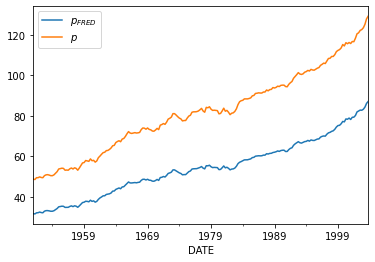

In [40]:
S.plot(y=[r"$p_{FRED}$", r"$p$"])
plt.show()

This is likely because the two series have different base years for the indices' calculations.

## De-meaning data

Let's normalize each series by its sample mean and then take the logarithm of these ratios.

This does not change statistical comovements.

It only removes scale (size) effects. 

This also makes interpretation easier. 

For example, we can interpret each de-meaned series as a (percentage) deviation from mean.

In [41]:
# Logged de-meaned data
Sdev = np.log(S.divide(S.mean()))

## HP-filtering

Business cycle analysts tend to filter out the low-frequency or long-run signals ($Y_{t}^{trend}$) in the raw or observed data ($Y_{t}^{o}$),

$Y_{t}^{o} - Y_{t}^{trend} = Y_{t}^{cycle},$

to get the cyclical component as a residual.

A popular filter is called the [Hodrick-Prescott (HP) filter](https://www.statsmodels.org/stable/generated/statsmodels.tsa.filters.hp_filter.hpfilter.html).

* It is cast as a Hilbert-space projection problem: Statisticians call this a solution to a "ridge regression" problem, a special case of [Tikhonov regularization of ill-posed problems](https://en.wikipedia.org/wiki/Tikhonov_regularization). 

* The HP filter can also be described as a *unobserved-component trend-plus-cycle* time-series (state-space) model. See the work by [Andrew Harvey](https://www.terrapub.co.jp/journals/jjss/pdf/3801/38010041.pdf).



We will apply this here to our demeaned data ``Sdev``.

For quarterly frequencies, economist tend to set the penalization constant (a.k.a. the HP smoothing parameter) as 1600.

However, in Shimer's paper, he opted for filtering out only very low frequency (i.e., very "long run") signals, thus setting this parameter (arbitrarily) as $10^{5}$.

## Replicating Shimer's correlation table with our data

Shimer's notation

* $u$ - unemployment level

* $v$ - vacancy level

* $\theta := v/u$ - labor market tightness

* $f$ - probability a worker finds a job in one period (author's model estimate)

* $p$ - average labor productivity (non-farm business sector output per person)

We'll loop over each series in the dataframe ``Sdev`` and apply the HP filter. 

The result will be two extracted components to each series. 

Each component is stored as a Python dictionary:

* trend signal, e.g., ``Y_trend``

* cycle component, e.g., ``Y_cycle``

,Std Deviation
Unemployment Rate,0.125089
$v$,0.138978
$\theta$,0.256592
$p$,0.013291


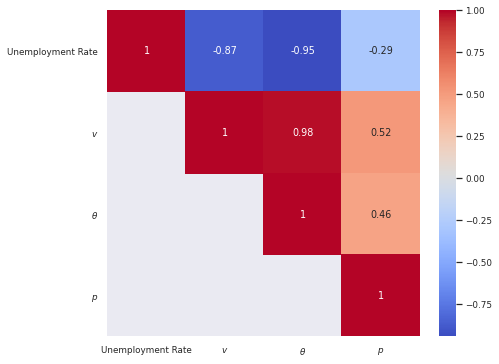

In [42]:
# Select subset of series from our dataframe Sdev (above)
sdvsub = Sdev[["Unemployment Rate", r"$v$", r"$\theta$", r"$p$"]]

# Filter data and plot correlation map
Ysdvsub_cycle, Ysdvsub_trend = hpfilter2df(sdvsub, λ=10**5)

# Sd and correlations
sd = Ysdvsub_cycle.std().to_frame()
sd.columns = ["Std Deviation"]
display(sd)
correlation_map(Ysdvsub_cycle)

## Replicating Shimer's correlation table with Shimer's data

In [43]:
# Report select series (Shimer's data)
select = [
          r"$u$", 
          r"$v$", 
          r"$\theta$",
          r"$f$",
          r"$p$",
         ]
ds = Sdev[select]

In [44]:
# HP smoothing parameter (Shimer, AER2005)
λ_shimer = 10**5

# HP Filter data in ds
Ys_cycle, Ys_trend = hpfilter2df(ds, λ=λ_shimer)

,Std Deviation
$u$,0.123406
$v$,0.138978
$\theta$,0.256592
$f$,0.076473
$p$,0.013291


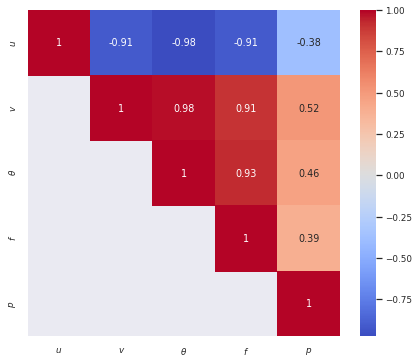

In [45]:
# Report standard deviations
sd = Ys_cycle.std().to_frame()
sd.columns = ["Std Deviation"]
display(sd)
correlation_map(Ys_cycle)

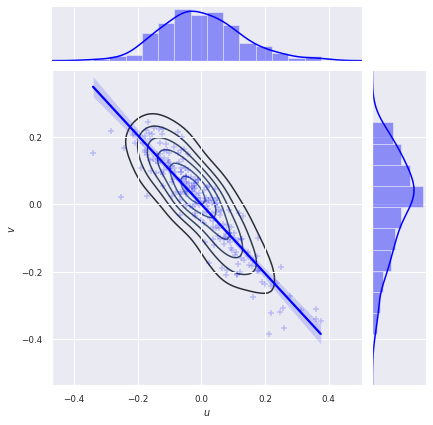

In [46]:
seaborn_jointplot(r"$u$", r"$v$", Ys_cycle)

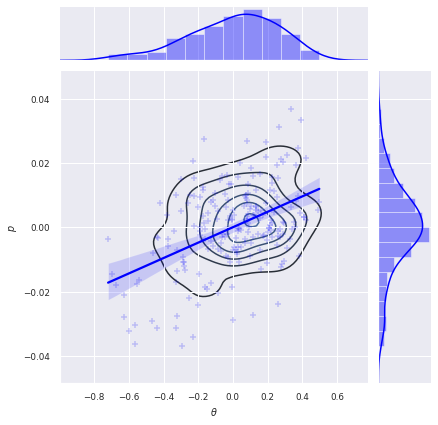

In [47]:
seaborn_jointplot(r"$\theta$", r"$p$", Ys_cycle)

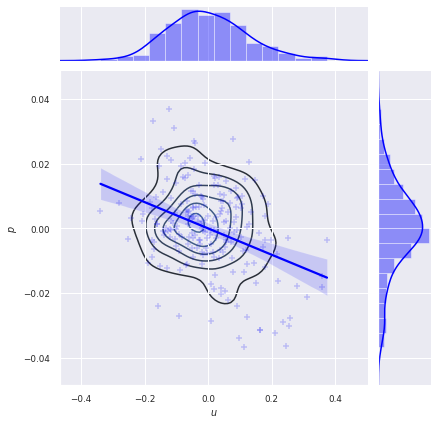

In [48]:
seaborn_jointplot(r"$u$", r"$p$", Ys_cycle)

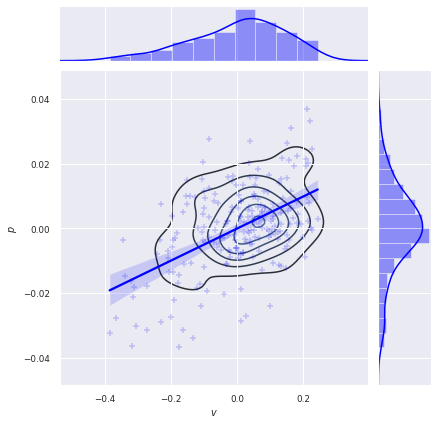

In [49]:
seaborn_jointplot(r"$v$", r"$p$", Ys_cycle)

## Revisit by Hagedorn and Manovskii

The authors used an HP filter smoothing parameter of $\lambda=1600$.

Let's try to replicate their result (in Table 3 of Hagedorn and Manovskii's (HM) paper) using Shimer's data plus our supplement of Shimer's labor productivity series.

Note: 

* HM has an additional year's worth of observations in addition to Shimer's dataset.

* HM dropped the constructed series on $f$.

* But's let's check this out anyway.

In [50]:
# HP smoothing parameter (HM, AER)
λ_hm = 1600
Yhms_cycle, Yhms_trend = hpfilter2df(ds, λ_hm)

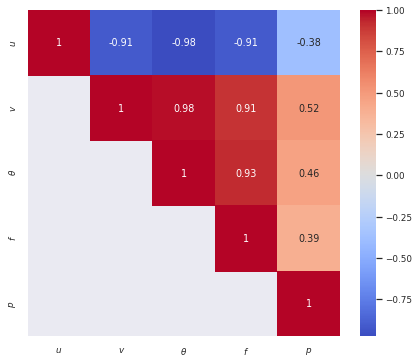

In [51]:
correlation_map(Yhms_cycle)

This table is close to HM's, but exhibit marginally larger correlations.

Note that HM used the unemployment rate series, whereas Shimer uses unemployment level. 

Just to be sure, we now use HM's data and reproduce their Table 3.

Now let's take HM's data set from their [source on the AER website](https://www.aeaweb.org/articles?id=10.1257/aer.98.4.1692).

Below, we assume you have already downloaded their source files to the same directory as this notebook.

In [52]:
dfhm = pd.read_stata('20060403_data/Data.dta')
dfhm.columns = ["year", "quarter", r"$p$", r"$w$", r"$u$", r"$v$"]
dfhm[r"$\theta$"] = dfhm[r"$v$"]/dfhm[r"$u$"]
dfhm.head()

,year,quarter,$p$,$w$,$u$,$v$,$\theta$
0,1951,1,48.799999,99.699997,3.500000,41.333332,11.809524
1,1951,2,48.700001,100.599998,3.100000,42.000000,13.548388
2,1951,3,49.599998,99.199997,3.166667,41.666668,13.157896
3,1951,4,49.599998,99.699997,3.366667,42.000000,12.475248
4,1952,1,50.000000,100.599998,3.066667,43.000000,14.021739


In [53]:
# Apply HP filter at HM's HP-filter smoothing parameter
dfhmm = dfhm.drop(columns=["year", "quarter", r"$w$"])
# reorder for ease of comparison to HM's Table and Shimer's Table
dfhmmo = dfhmm[[r"$u$", r"$v$", r"$\theta$", r"$p$"]]
dfhmmo = np.log(dfhmmo.divide(dfhmmo.mean()))
Yhm_cycle, Yhm_trend = hpfilter2df(dfhmmo, λ=10.**5.0)

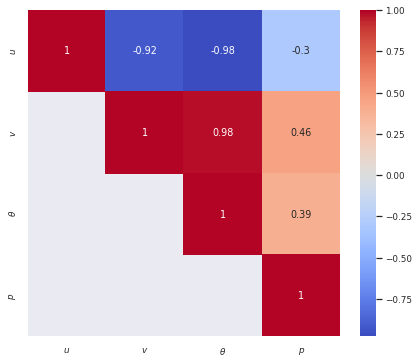

In [54]:
correlation_map(Yhm_cycle)

This reproduces Table 3 in HM exactly.

# Key Labor Market Observations

We'll summarize the co-movement (correlation) facts shown earlier.

## Fact 1

1. $u$ and $v$ are negatively correlated;

2. $u$ and $p$ are negatively correlated; and

3. $\theta$ and $p$ are positively correlated

over the business cycle.

These imply that:

4. $u$ and $\theta$ are negatively correlated.

5. $v$ and $p$ are positively correlated.

6. $v$ and $\theta$ are positively correlated.

## Fact 2

The U.S. Beveridge curve (Fact 1.1) appears to have shifted up since the Great Recession (2008).

In [55]:
# Breaking up our quarterly sample in dfQY
start_date = '2000-12-31'
great_recession_date = '2007-12-31'
pre_great_recession = (dfQY.index >= start_date) & (dfQY.index < great_recession_date) 
post_great_recession = (dfQY.index >= great_recession_date)
Y_pre = dfQY[pre_great_recession]
Y_post = dfQY[post_great_recession]

In [56]:
def beveridge_prepost(Y_pre, Y_post):
    """Function to separately plot Beveridge curve data
    (unemployment, vacancies) for two separate sample periods
    stored in dataframes Y_pre, Y_post."""

    plt.figure()

    # Before Dec 2007
    u_pre = Y_pre['Unemployment Rate']
    v_pre = Y_pre['Vacancy Rate']
    # Convert timestamp to yyyy-mm-dd string
    min_pre = str(pd.to_datetime(Y_pre.index.min()).date())
    max_pre = str(pd.to_datetime(Y_pre.index.max()).date())
    plt.plot(u_pre, v_pre, 'ob', 
             alpha=0.3,
             label=min_pre+" to "+max_pre)

    # After Dec 2007
    u_post = Y_post['Unemployment Rate']
    v_post = Y_post['Vacancy Rate']
    # Convert timestamp to yyyy-mm-dd string
    min_post= str(pd.to_datetime(Y_post.index.min()).date())
    max_post= str(pd.to_datetime(Y_post.index.max()).date())
    u_start = Y_post['Unemployment Rate'].iloc[0]
    v_start = Y_post['Vacancy Rate'].iloc[0]
    plt.plot(u_start, v_start, 'sg', alpha=1.0)
    plt.plot(u_post, v_post, 'xr', label=min_post+" to "+max_post)
    # Mark start points of post-GR sample
    u_start = Y_post['Unemployment Rate'].iloc[0]
    v_start = Y_post['Vacancy Rate'].iloc[0]
    plt.annotate(min_post, xy=(u_start, v_start))
    # Mark end points of great recession
    u_endgr = Y_post[Y_post.index == '2015-12-31']["Unemployment Rate"]
    v_endgr = Y_post[Y_post.index == '2015-12-31']["Vacancy Rate"]
    plt.plot(u_endgr, v_endgr, '*m', alpha=1.0)
    plt.annotate('2015-12-31', xy=(u_endgr, v_endgr))
    
    # Mark end points of total sample
    u_end = Y_post['Unemployment Rate'].iloc[-1]
    v_end = Y_post['Vacancy Rate'].iloc[-1]
    plt.plot(u_end, v_end, 'sr', alpha=1.0)
    plt.annotate(max_post, xy=(u_end, v_end))
    

    # Axes labels
    plt.xlabel("Unemployment Rate")
    plt.ylabel("Vacancy Rate")
    plt.legend()

    plt.show()

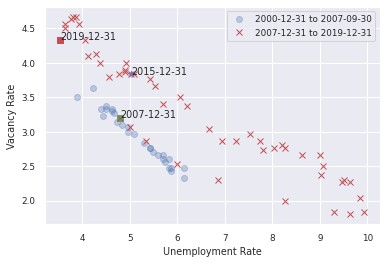

In [57]:
beveridge_prepost(Y_pre, Y_post)

# Accounting for business-cycle statistics

In class we will discuss two models that help us understand potential reasons for these observed regularities.

These models will be simplified versions of more explicit, dynamic and stochastic models used in research and policy modelling.

* Here's some extra notes: [our replication of a global, nonlinear solution of a dynamic and stochastic version of the two-sided search model](https://github.com/phantomachine/courses/blob/master/Petrosky-Nadeau-Zhang%20Revisits%20Hagedorn-Manovskii%20DMP.html).

* They account for some of the business cycle facts summarized above quite well.

* This is advanced material taught typically in a second-year PhD program.

# Readings

* Williamson, S. (2018), *Macroeconomics* (6th edition). Pearson Publishers. (Chapter 6).

* Hagedorn, Marcus, and Iourii Manovskii. 2008. ["The Cyclical Behavior of Equilibrium Unemployment and Vacancies Revisited." American Economic Review, 98 (4): 1692-1706](https://doi.org/10.1257/aer.98.4.1692).

* Shimer, Robert. 2005. ["The Cyclical Behavior of Equilibrium Unemployment and Vacancies." American Economic Review, 95 (1): 25-49](https://doi.org/10.1257/0002828053828572). 

* Petrosky‐Nadeau, N. and Zhang, L. (2017), ["Solving the Diamond–Mortensen–Pissarides model accurately." *Quantitative Economics*, 8: 611-650](https://doi.org/10.3982/QE452)

* Ljungqvist, L. and Sargent, T. (2019), *Recursive Macroeconomic Theory* (4th edition). (Chapter 6).